<a href="https://colab.research.google.com/github/financieras/bigdata/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
https://www.ahk.es/es/servicios/formacion/proyecto-big-data-programa-dual-analisis-de-datos-y-procesos

## Tasl 1.1

### ¿Qué porcentaje de ofertas hay en Madrid?
* Total registros: 5423
* Contar Madrid: 2023
* Porcentaje Madrid: 37.30%

### ¿Qué ciudad está en el 10º lugar?
* Alicante (si consideramos `online` como si fura una city)

In [ ]:
!git clone https://github.com/financieras/bigdata.git

Cloning into 'bigdata'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 133.61 KiB | 888.00 KiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import pandas as pd
pth = "bigdata/dataset_reto.csv"
df = pd.read_csv(pth)

In [ ]:
df.shape        # nos da las dimensiones de la tabla

(5423, 7)

In [ ]:
df.head()       # mustra las cinco primeras filas de la tabla

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
0,desarrollador/a php-moodl,Madrid,2022-09-30,"['php', 'lms', 'moodle', 'mysql']",31500.0,7,2022-10-02
1,analista programador spark/scala,Madrid,2022-09-30,"['scala', 'spark']",31500.0,0,2022-10-02
2,desarrollador de android,Madrid,2022-10-02,['android'],no disponible,2,2022-10-02
3,administrador/a microsoft azure - remoto,Online,2022-10-02,"['hyper v', 'azure', 'itil', 'mcafee', 'o365']",31500.0,22,2022-10-02
4,hardware test engineer (automoción),Tarragona,2022-10-02,"['python', 'testing']",no disponible,2,2022-10-02


In [ ]:
df['Salary'].value_counts()

Salary
no disponible        3679
31500.0               112
34500.0               111
33000.0               111
39000.0               101
                     ... 
5407.200000000001       1
5170.799999999999       1
7500.0                  1
10800.0                 1
68000.0                 1
Name: count, Length: 83, dtype: int64

In [ ]:
df['Copy'].value_counts()

Copy
2022-11-27    2690
2022-11-13     395
2022-11-20     385
2022-10-16     369
2022-10-23     351
2022-10-02     326
2022-11-06     326
2022-10-30     291
2022-10-09     290
Name: count, dtype: int64

In [ ]:
df['Jobtitle'].value_counts()[df['Jobtitle'].value_counts() == 9]

Jobtitle
it business analys    9
devops engi           9
frontend develop      9
Name: count, dtype: int64

In [ ]:
df[df['Jobtitle'] == "analista programador xamarin for android"]

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
4228,analista programador xamarin for android,Madrid,2022-09-30,"['android', 'xamarin']",36000.0,13,2022-11-27


In [ ]:
#import pandas as pd

# El DataFrame se llama df y la columna de la ciudad se llama 'City'
frecuencia_ciudades = df['City'].value_counts()

# Ordenar las frecuencias en orden descendente
frecuencia_ciudades_ordenada = frecuencia_ciudades.sort_values(ascending=False)

# Obtener el nombre de la ciudad en el décimo lugar
ciudad_decimo_lugar = frecuencia_ciudades_ordenada.index[9]  # Index devuelve el índice y lo usamos para acceder al nombre de la ciudad

print("La ciudad en el décimo lugar por frecuencia es:", ciudad_decimo_lugar)       # Alicante


La ciudad en el décimo lugar por frecuencia es: Alicante


In [ ]:
#import pandas as pd

# El DataFrame se llama df y la columna de la ciudad se llama 'City'
total_registros = len(df)  # Número total de registros en el DataFrame

# Contar cuántos registros son de la ciudad de Madrid
registros_madrid = df[df['City'] == 'Madrid'].shape[0]  # Filtrar registros de Madrid y contarlos

# Calcular el porcentaje de registros que son de Madrid
porcentaje_madrid = (registros_madrid / total_registros) * 100

print("El porcentaje de registros que son de la ciudad de Madrid es:", porcentaje_madrid, "%")


El porcentaje de registros que son de la ciudad de Madrid es: 37.30407523510972 %


## Tasl 1.2
¿Cuál es la ciudad entre las 10 ciudades con más anuncios con la media de candidatos más baja?
* Zaragoza con 8.9 candidatos por plaza ofertada.


In [ ]:
#import pandas as pd

# Suponiendo que tu DataFrame se llama df
# Agrupar por ciudad y calcular el número total de anuncios y la media de candidatos
city_stats = df.groupby('City').agg({'Candidates': 'mean', 'Jobtitle': 'count'})

# Ordenar las ciudades por el número de anuncios en orden descendente y seleccionar las 10 primeras
top_10_cities = city_stats.nlargest(10, 'Jobtitle')

# Calcular la media de candidatos para las 10 ciudades
mean_candidates_top_10 = top_10_cities['Candidates'].mean()

# Encontrar la ciudad con la media de candidatos más baja
city_with_lowest_avg_candidates = top_10_cities[top_10_cities['Candidates'] == top_10_cities['Candidates'].min()].index[0]

print(f"La ciudad entre las 10 ciudades con más anuncios con la media de candidatos más baja es: {city_with_lowest_avg_candidates}, con una media de {mean_candidates_top_10} candidatos.")


La ciudad entre las 10 ciudades con más anuncios con la media de candidatos más baja es: Zaragoza, con una media de 24.515623817948132 candidatos.


In [ ]:
# Filtrar el DataFrame por la ciudad de "Zaragoza"
zaragoza_jobs = df[df['City'] == 'Zaragoza']

# Contar el número de ofertas de trabajo para Zaragoza
num_zaragoza_jobs = zaragoza_jobs.shape[0]

print(f"El número de ofertas de trabajo para la ciudad de Zaragoza es: {num_zaragoza_jobs}")

El número de ofertas de trabajo para la ciudad de Zaragoza es: 85


In [ ]:
# Filtrar el DataFrame por la ciudad de "Zaragoza"
zaragoza_jobs = df[df['City'] == 'Zaragoza']

# Calcular el número total de candidatos para las ofertas de trabajo en Zaragoza
total_candidates_zaragoza = zaragoza_jobs['Candidates'].sum()

print(f"El número total de candidatos para todas las ofertas de trabajo en la ciudad de Zaragoza es: {total_candidates_zaragoza}")

El número total de candidatos para todas las ofertas de trabajo en la ciudad de Zaragoza es: 763


In [ ]:
763/85

8.976470588235294

In [ ]:
# Agrupar por ciudad y calcular el número total de anuncios y la media de candidatos
city_stats = df.groupby('City').agg({'Candidates': 'mean', 'Jobtitle': 'count'})
city_stats

,Candidates,Jobtitle
City,,
A Coruña,17.195122,41
Albacete,15.666667,3
Alicante,22.333333,51
Almería,15.333333,15
Asturias,48.058824,34
Badajoz,10.375000,8
Baleares,17.416667,12
Barcelona,22.057652,954
Bizkaia,10.143939,132


In [ ]:
# Suponiendo que tu DataFrame se llama df
# Agrupar por ciudad y calcular el número total de anuncios y la media de candidatos
city_stats = df.groupby('City').agg({'Candidates': 'mean', 'Jobtitle': 'count'})

# Ordenar las ciudades por el número de anuncios en orden descendente y seleccionar las 10 primeras
top_10_cities = city_stats.nlargest(10, 'Jobtitle')
top_10_cities

,Candidates,Jobtitle
City,,
Madrid,17.630252,2023
Online,44.007759,1160
Barcelona,22.057652,954
Valencia,32.265918,267
Bizkaia,10.143939,132
Málaga,13.915385,130
Zaragoza,8.976471,85
Sevilla,20.580247,81
Murcia,53.245283,53


In [ ]:
# Agrupar por ciudad y calcular el número total de anuncios y la media de candidatos
city_stats = df.groupby('City').agg({'Candidates': 'mean', 'Jobtitle': 'count'})

# Ordenar las ciudades por el número de anuncios en orden descendente y seleccionar las 10 primeras
top_10_cities = city_stats.nlargest(10, 'Jobtitle')

# Calcular la media de candidatos para las 10 ciudades
mean_candidates_top_10 = top_10_cities['Candidates'].mean()
mean_candidates_top_10

24.515623817948132

In [ ]:
#import pandas as pd

# Filtrar el DataFrame por la ciudad de "Zaragoza"
zaragoza_jobs = df[df['City'] == 'Zaragoza']

# Calcular la media de candidatos para las ofertas de trabajo en Zaragoza
mean_candidates_zaragoza = zaragoza_jobs['Candidates'].mean()

print(f"La media de candidatos para las ofertas de trabajo en la ciudad de Zaragoza es: {mean_candidates_zaragoza}")


La media de candidatos para las ofertas de trabajo en la ciudad de Zaragoza es: 8.976470588235294


Task 1.3
¿Cuál es la ciudad con las peores oportunidades, la que se encuentra más en la esquina derecha abajo?

* Elegir entre:
    1. Zaragoza
    2. Murcia
    3. Málaga
    4. Oviedo

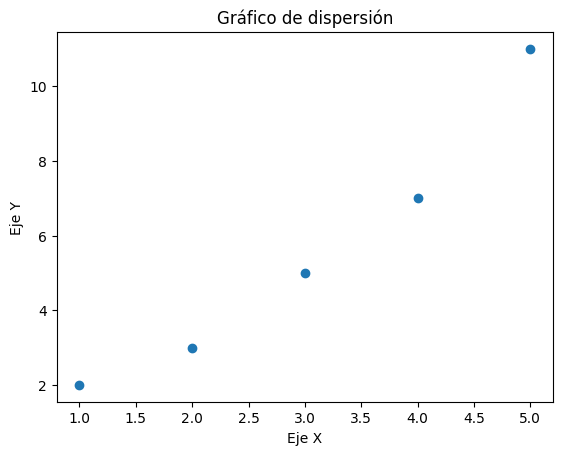

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Agregar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión')

# Mostrar el gráfico
plt.show()


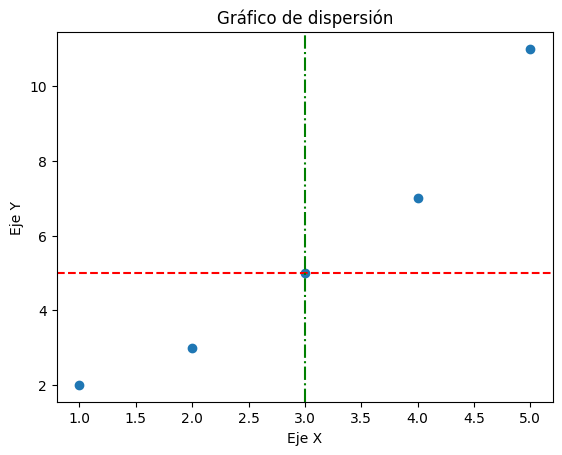

In [ ]:
#import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Agregar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión')

# Dibujar línea horizontal en y=5
plt.axhline(y=5, color='r', linestyle='--')

# Dibujar línea vertical en x=3
plt.axvline(x=3, color='g', linestyle='-.')

# Mostrar el gráfico
plt.show()


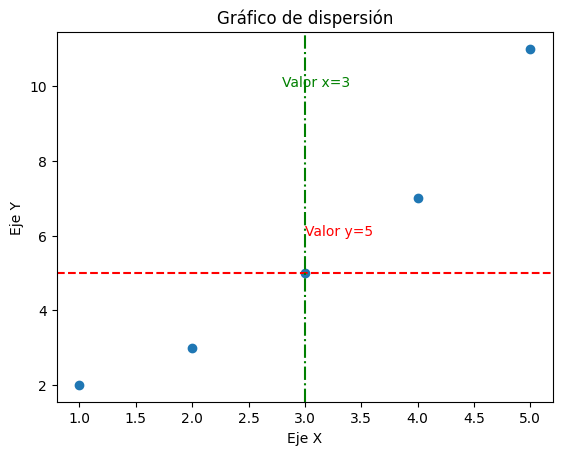

In [ ]:
#import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Agregar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión')

# Dibujar línea horizontal en y=5
plt.axhline(y=5, color='r', linestyle='--')

# Dibujar línea vertical en x=3
plt.axvline(x=3, color='g', linestyle='-.')

# Agregar etiquetas de texto
plt.text(3, 6, 'Valor y=5', fontsize=10, color='red')
plt.text(2.8, 10, 'Valor x=3', fontsize=10, color='green')

# Mostrar el gráfico
plt.show()


# Task 2

## Task 2.1

¿En cuántos anuncios se piden conocimientos de Python?

336


## Task 2.2

¿Cuál de las 50 tecnologías más demandadas ofrece la mejor relación entre candidatos y ofertas?

Seleccione una:
1. Javascript
2. Azure
3. Python
4. SAP



In [1]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'Nombre': ['Juan', 'María', 'Pedro', 'Luis', 'Ana'],
        'Edad': [25, 30, 35, 40, 45]}
df = pd.DataFrame(data)

# Buscar la cadena 'a' en la columna 'Nombre'
resultado = df['Nombre'].str.contains('a')

# Mostrar el resultado
print(resultado)


0     True
1     True
2    False
3    False
4     True
Name: Nombre, dtype: bool


Vamos con la tarea 2.2

In [2]:
!git clone https://github.com/financieras/bigdata.git

Cloning into 'bigdata'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 180.11 KiB | 15.01 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pth = "bigdata/dataset_reto.csv"
df = pd.read_csv(pth)

In [23]:
df["Skills"][31]

"['oracle', 'access', 'sql server', 'mysql']"

In [25]:
import ast

# Ejemplo de datos
skills = ["['php', 'lms', 'moodle', 'mysql']",
          "['scala', 'spark']",
          "['android']",
          "['hyper v', 'azure', 'itil', 'mcafee', 'o365']",
          "['python', 'testing']",
          "['altium', 'electronica', 'emc', 'spice']",
          "['cplusplus', 'qtcreator', 'webservices', 'mysql', 'sqlite']",
          "['oracle', 'access', 'sql server', 'mysql']"]

# Convertir strings a listas de Python
skills_list = [ast.literal_eval(skill) for skill in skills]

print(skills_list)
print(skills_list[0][0])    # ASI LOGRO ACCEDER A LOS SKILLS O TECNOLOGÍAS QUE SE PIDEN EN CADA EMPLEO

[['php', 'lms', 'moodle', 'mysql'], ['scala', 'spark'], ['android'], ['hyper v', 'azure', 'itil', 'mcafee', 'o365'], ['python', 'testing'], ['altium', 'electronica', 'emc', 'spice'], ['cplusplus', 'qtcreator', 'webservices', 'mysql', 'sqlite'], ['oracle', 'access', 'sql server', 'mysql']]
php


In [30]:
import ast

# Convertir strings a listas de Python
skills_matrix = [ast.literal_eval(skill) for skill in df["Skills"]]

print(skills_matrix)
print(skills_matrix[0])
print(skills_matrix[0][0])

contador = 0
for fila in skills_matrix:
    for habilidad in fila:
        if habilidad == "python":
            contador += 1

print(contador)

[['php', 'lms', 'moodle', 'mysql'], ['scala', 'spark'], ['android'], ['hyper v', 'azure', 'itil', 'mcafee', 'o365'], ['python', 'testing'], ['altium', 'electronica', 'emc', 'spice'], ['cplusplus', 'qtcreator', 'webservices', 'mysql', 'sqlite'], ['servicenow'], ['ingenieria', 'informatica', 'ciencias'], ['powercenter', 'oracle', 'teradata'], ['visual basic', 'oracle', '.net'], ['testing'], ['mvc', 'sitecore', '.net'], ['android', 'windows', 'iphone', 'word', 'ipad', 'excel', 'outlook', 'macros', 'powerpoint', 'access', 'vba'], ['banca', 'banksphere'], ['java'], ['negocio', 'consultoria', 'appian'], ['soporte', 'windows'], ['itil', 'redes', 'sistemas'], ['redes'], ['python', 'cplusplus', 'opencv', 'stl', 'directx', 'uml', '.net'], ['c#', '.net', 'api'], ['reactjs', '.net', 'c#'], ['infraestructura', 'cableado estructurado'], ['success factors', 'sap'], ['soporte', 'service desk'], ['it'], ['marketing', 'social media'], ['ios android', 'reactjs', 'ionic', 'nodejs', 'angularjs', 'java', 'r

In [31]:
# ponemos todas las tecnologías en una sola lista
skills_arr = [elemento for fila in skills_matrix for elemento in fila]
len(skills_arr)

17512

In [35]:
from collections import Counter

# Contar la frecuencia de cada elemento
frecuencias = Counter(skills_arr)

# Frecuencia mínima deseada
frecuencia_minima = 50

# Crear una lista de tuplas con las claves y valores filtrados según la frecuencia mínima
tuplas_filtradas = [(skill, frecuencia) for skill, frecuencia in frecuencias.items() if frecuencia >= frecuencia_minima]

# Ordenar la lista de tuplas por frecuencia descendente
tuplas_ordenadas = sorted(tuplas_filtradas, key=lambda x: x[1], reverse=True)

print(len(tuplas_ordenadas))
print(tuplas_ordenadas)

71
[('java', 801), ('.net', 469), ('sql', 345), ('linux', 338), ('python', 336), ('javascript', 334), ('angularjs', 333), ('spring', 298), ('azure', 259), ('sap', 258), ('windows', 256), ('php', 243), ('c#', 233), ('oracle', 222), ('reactjs', 219), ('aws', 217), ('cplusplus', 187), ('css', 173), ('html', 160), ('git', 152), ('nodejs', 140), ('redes', 127), ('sql server', 122), ('jira', 117), ('jenkins', 115), ('microservicios', 115), ('docker', 115), ('mysql', 111), ('qa', 111), ('agile', 110), ('cloud', 109), ('vmware', 103), ('kubernetes', 102), ('api', 101), ('soporte', 100), ('scrum', 99), ('typescript', 93), ('android', 92), ('c', 91), ('power bi', 89), ('devops', 85), ('ciberseguridad', 83), ('marketing', 80), ('ios', 78), ('data', 74), ('active directory', 73), ('cisco', 73), ('dynamics', 72), ('vuejs', 71), ('unix', 69), ('pl/sql', 67), ('testing', 66), ('laravel', 65), ('software', 63), ('rest', 62), ('microinformatica', 62), ('selenium', 58), ('helpdesk', 57), ('j2ee', 57), (